# Prophet

In [1]:
# установите Prophet, если у вас его ещё нет
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 10.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.9/13.3 MB 11.2 MB/s eta 0:00:01
   ------------------- -------------------- 6.6/13.3 MB 11.5 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.3 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 8.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

Для работы будем использовать датасет с данными о просмотрах статьи [Peyton Manning](https://en.wikipedia.org/wiki/Peyton_Manning) на Википедии. Число просмотров уже прологарифмировано для уменьшения масштабов разброса.

Для корректной работы Prophet не обязательно парсить дату в индекс датафрейма.

In [4]:
df = pd.read_csv('data/wp_log_R.csv')
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


<Axes: xlabel='ds'>

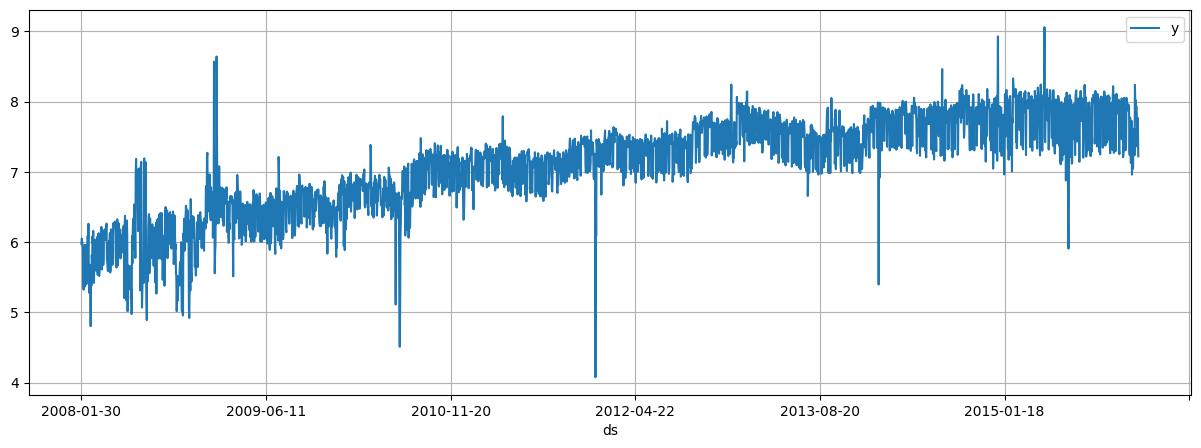

In [5]:
df.plot(x='ds', y='y', figsize=(15, 5), grid=True)

Посмотрим сразу, как Prophet справится с построением модели "из коробки":

In [6]:
m = Prophet()
m.fit(df)

13:22:34 - cmdstanpy - INFO - Chain [1] start processing
13:22:35 - cmdstanpy - INFO - Chain [1] done processing


Для построения прогноза можно сгенерировать расширенный датафрейм "на будущее" при помощи специальной встроенной функции:

In [7]:
future = m.make_future_dataframe(periods=365)  # имеющийся период + год
future.tail()

,ds
3223,2016-12-26
3224,2016-12-27
3225,2016-12-28
3226,2016-12-29
3227,2016-12-30


При помощи метода `predict` мы можем получить прогноз на сгенерированный датафрейм `future`. При этом в качестве результата Prophet генерирует не только значение ряда, но и верхнюю и нижнюю границы доверительного интервала а также компоненты модели (тоже с доверительными интервалами). 

- `yhat` - предсказанное значение
- `yhat_upper` / `yhat_lower` - верхняя и нижняя граница доверительного интервала. Для других столбцов также имеются их границы с приставками `upper` и `lower`
- `trend` - компонента тренда
- `weekly` - недельная сезонность
- `yearly` - годовая сезонность
- `additive_terms` - сумма всех аддитивных сезонностей
- `multiplicative_terms` - произведение всех мультипликативных сезонностей (по дефолту они не используются)

In [8]:
forecast = m.predict(future)
forecast.tail(14)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3214,2016-12-17,7.804923,6.933447,7.699250,7.563948,8.059571,-0.513540,-0.513540,-0.513540,-0.319147,-0.319147,-0.319147,-0.194393,-0.194393,-0.194393,0.0,0.0,0.0,7.291383
3215,2016-12-18,7.804971,6.889697,7.654356,7.563148,8.061272,-0.531148,-0.531148,-0.531148,-0.313560,-0.313560,-0.313560,-0.217588,-0.217588,-0.217588,0.0,0.0,0.0,7.273822
3216,2016-12-19,7.805019,7.284012,8.100712,7.562138,8.062386,-0.139801,-0.139801,-0.139801,0.099454,0.099454,0.099454,-0.239255,-0.239255,-0.239255,0.0,0.0,0.0,7.665217
3217,2016-12-20,7.805066,7.339817,8.110975,7.561128,8.063296,-0.095387,-0.095387,-0.095387,0.163570,0.163570,0.163570,-0.258957,-0.258957,-0.258957,0.0,0.0,0.0,7.709680
3218,2016-12-21,7.805114,7.323229,8.117587,7.560118,8.064205,-0.107277,-0.107277,-0.107277,0.169005,0.169005,0.169005,-0.276282,-0.276282,-0.276282,0.0,0.0,0.0,7.697837
3219,2016-12-22,7.805162,7.272200,8.043025,7.559108,8.065047,-0.141824,-0.141824,-0.141824,0.149027,0.149027,0.149027,-0.290851,-0.290851,-0.290851,0.0,0.0,0.0,7.663338
3220,2016-12-23,7.805210,7.157559,7.957524,7.558098,8.065860,-0.250672,-0.250672,-0.250672,0.051651,0.051651,0.051651,-0.302324,-0.302324,-0.302324,0.0,0.0,0.0,7.554538
3221,2016-12-24,7.805258,6.800773,7.582679,7.557088,8.066672,-0.629556,-0.629556,-0.629556,-0.319147,-0.319147,-0.319147,-0.310409,-0.310409,-0.310409,0.0,0.0,0.0,7.175702
3222,2016-12-25,7.805306,6.792671,7.583235,7.556078,8.068396,-0.628432,-0.628432,-0.628432,-0.313560,-0.313560,-0.313560,-0.314872,-0.314872,-0.314872,0.0,0.0,0.0,7.176874
3223,2016-12-26,7.805353,7.212712,7.993577,7.555574,8.070155,-0.216085,-0.216085,-0.216085,0.099454,0.099454,0.099454,-0.315538,-0.315538,-0.315538,0.0,0.0,0.0,7.589268


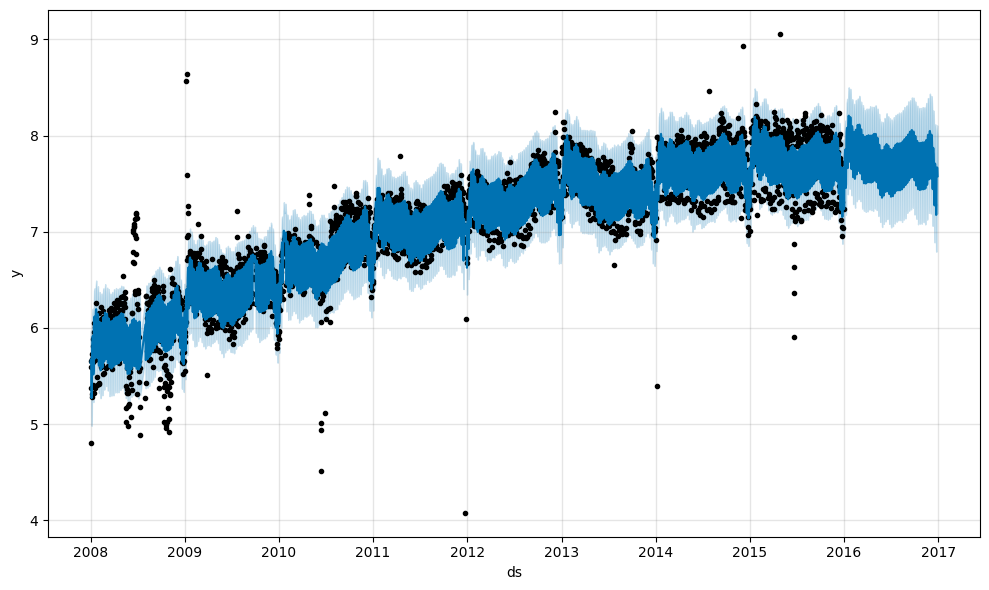

In [9]:
# в Prophet есть встроенная функция для построения ряда

f = m.plot(forecast)

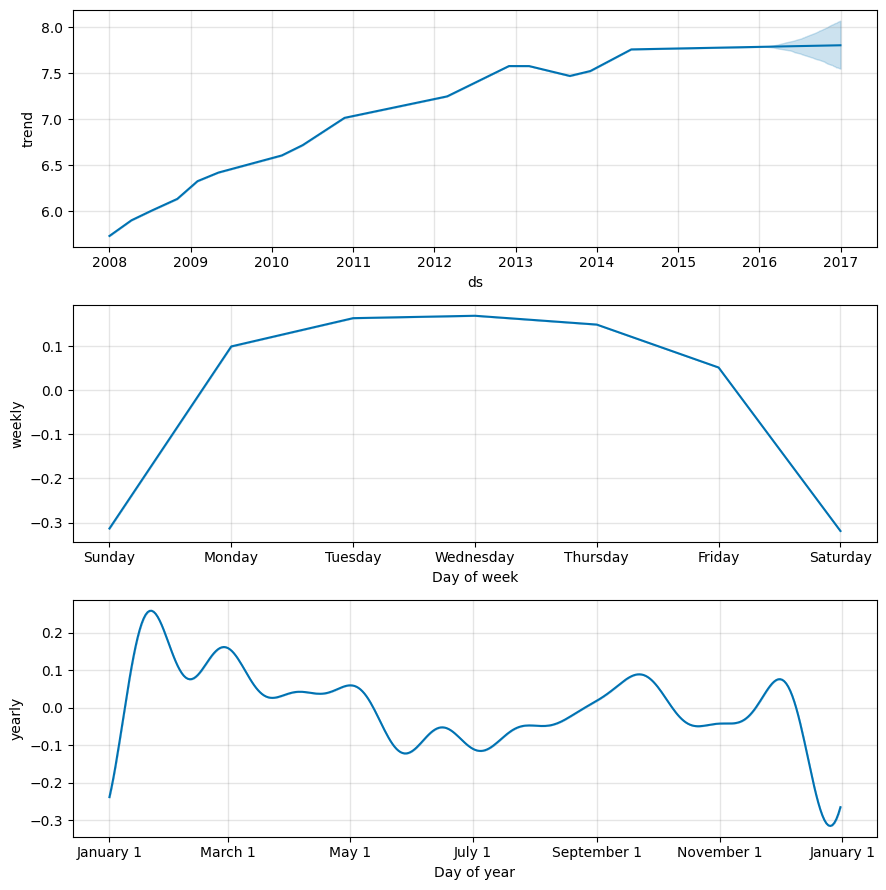

In [10]:
# также можем вывести график отдельных компонентов

f = m.plot_components(forecast)

### Настройка тренда

Как мы видим, по дефолту Prophet использует кусочно-линейный тренд. Давайте узнаем, как можно влиять на точки перемены тренда и как использовать логистический тренд с насыщением.

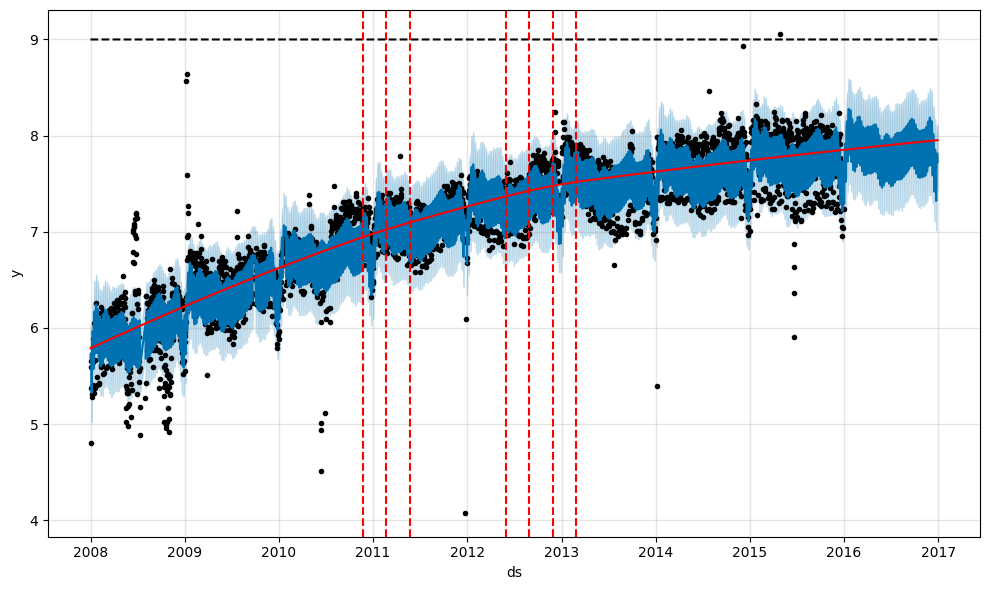

In [18]:
# чтобы отобразить точки перемены тренда, используем специальную доп функцию add_changepoints_to_plot

from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

NameError: name 'add_changepoints_to_plot' is not defined

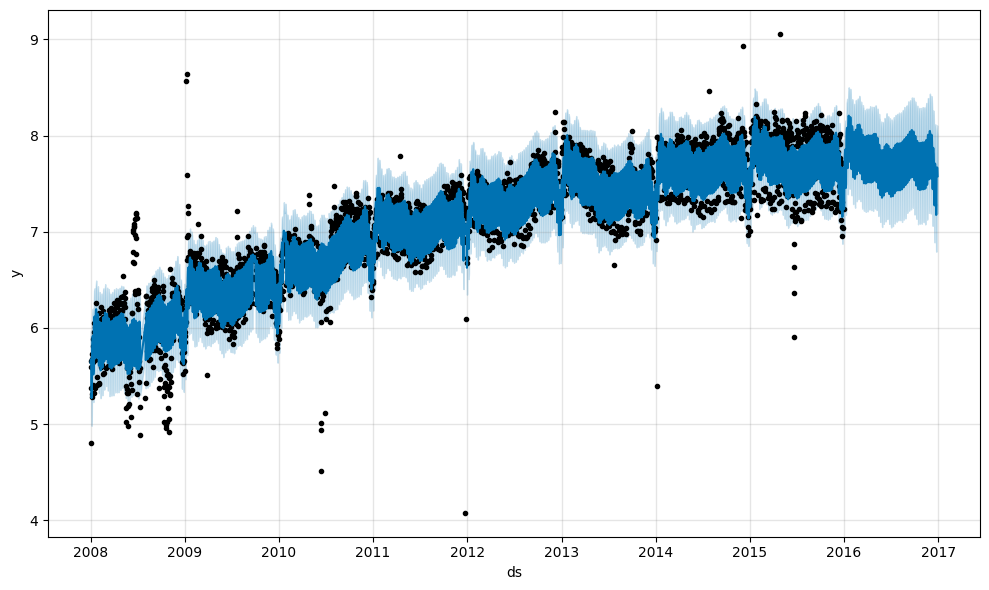

In [12]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [19]:
# укажем одинаковую вместимость на весь период

df['cap'] = 9

In [20]:
# модель с логистическим трендом

m = Prophet(growth='logistic')
m.fit(df)

13:26:42 - cmdstanpy - INFO - Chain [1] start processing
13:26:43 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# продлим датафрейм сразу на 5 лет, предполагая ту же вместимость тренда

future = m.make_future_dataframe(periods=365)
future['cap'] = 9

In [22]:
forecast = m.predict(future)

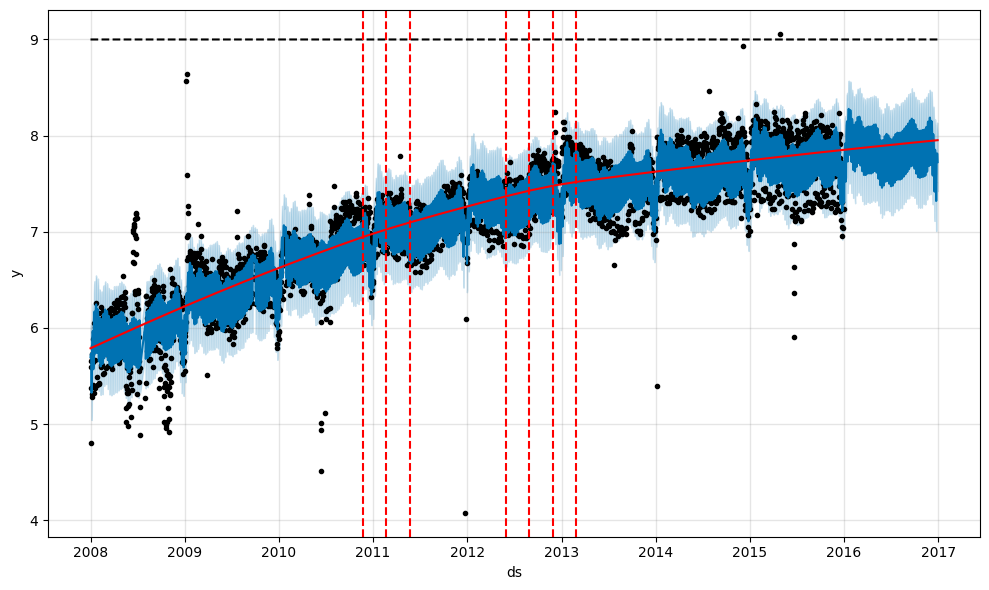

In [23]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [24]:
# передаём кастомные праздники
m = Prophet()

# добавляем встроенные для США
m.add_country_holidays(country_name='US')

m.fit(df)

13:28:52 - cmdstanpy - INFO - Chain [1] start processing
13:28:53 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
m.train_holiday_names

0                  New Year's Day
1                    Memorial Day
2                Independence Day
3                       Labor Day
4                    Veterans Day
5                    Thanksgiving
6                   Christmas Day
7      Martin Luther King Jr. Day
8           Washington's Birthday
9                    Columbus Day
10    Independence Day (observed)
11      New Year's Day (observed)
12       Christmas Day (observed)
13        Veterans Day (observed)
dtype: object

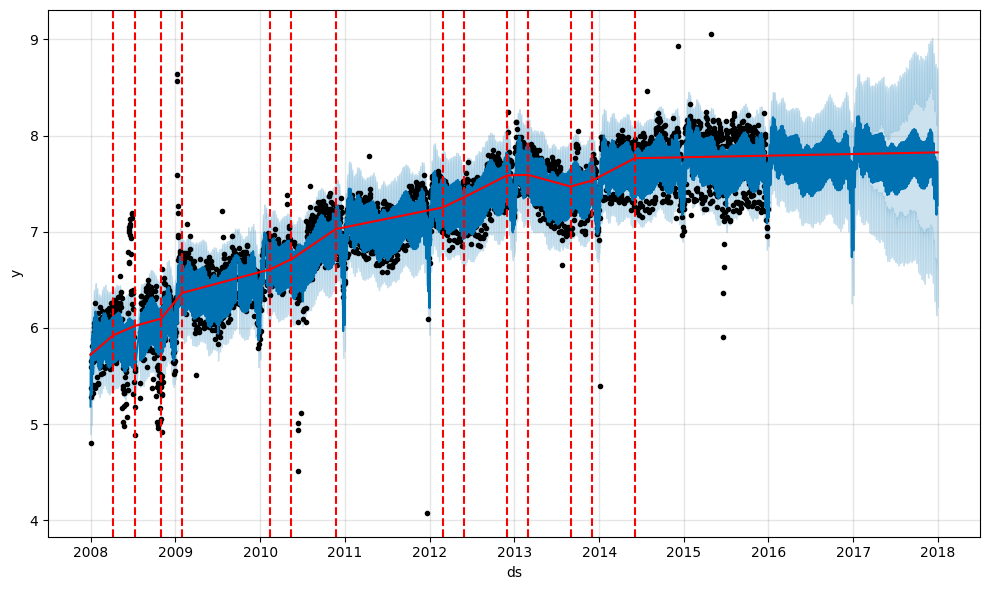

In [26]:
future = m.make_future_dataframe(periods=730)

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

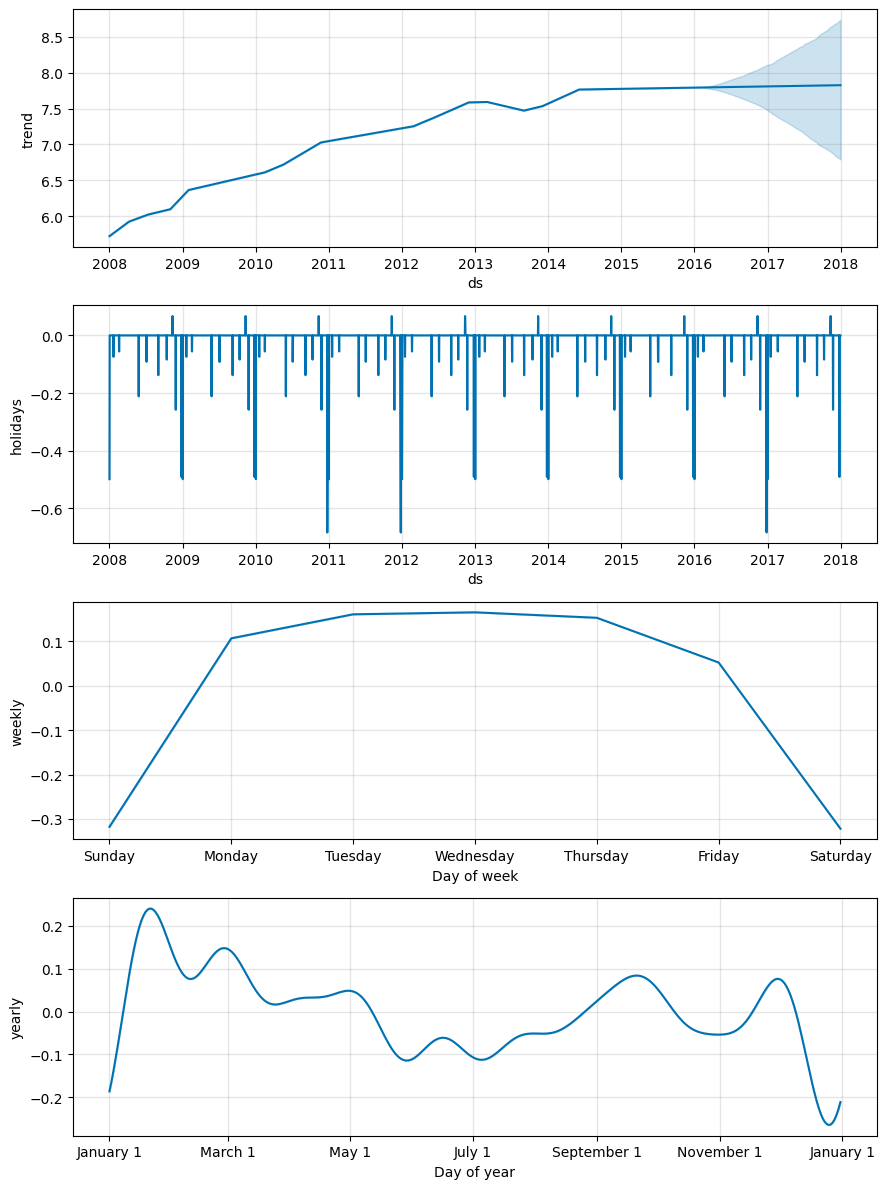

In [27]:
fig = m.plot_components(forecast)